# Basic User Guide

The SLSQP algorithm is designed to minimize a scalar objective function 
of one or more variables, subject to constraints.
The `optimize()` function is a wrapper to the original SLSQP 
implementation by Dieter Kraft {cite:p}`kraft1988software, kraft1994algorithm`. 
The PySLSQP wrapper provides a slightly modified interface to the
optimization problem and many additional features, compared to the Scipy wrapper.

The `optimize` function solves the general nonlinear programming problem: 

\begin{align*}
\underset{x \in \mathbb{R}^n}{\text{minimize}} \quad & f(x) \\
\text{subject to} \quad & c_i(x) = 0, \quad & i = 1,...,meq \\
& c_i(x) \geq 0,  \quad & i = meq+1,...,m \\
& xl_i \leq x_i \leq  xu_i, \quad & i = 1,...,n
\end{align*}


where $x$ is the vector of optimization variables with size $n$, $f(x)$ is the scalar objective function,
$c(x)$ is the vector-valued constraint function, and $xl$ and $xu$ are vectors of lower and
upper bounds, respectively. The first $meq$ constraints are equalities
while the remaining $ (m - meq) $ constraints are inequalities.

## Defining your optimization problem

We previously looked at a very simple example in the [Getting Started](./getting_started.md) section.
Now, let's look at a more complex problem that has both equality and inequality constraints, with variable bounds.
Here, we aim to minimize `x^2 + y^2` 
subject to the constraints `x+y=1` and `3x+2y>=1`, with the bounds `x>=0.4` and `y<=0.6`.

Now we write this example in the standard problem format shown above for SLSQP:
\begin{align*}
\underset{x \in \mathbb{R}^2}{\text{minimize}} \quad & x_1^2 + x_2^2\\
\text{subject to} \quad & x_1 + x_2 - 1 = 0, \\
& 3x_1 + 2x_2 - 1 \geq 0,  \\
\text{with} \quad & meq = 1, xl = [0.4, +\infty]^T, \; \text{and} \; xu = [-\infty, 0.6].
\end{align*}

The code below defines the computation for the objective, constraint and their derivatives.
It also defines the initial guess $x0$ and other problem variables such as $meq$, $xl$, and $xu$.

In [1]:
import numpy as np

# "x" represents the vector of optimization variables
def objective(x):
    # the objective function
    return x[0]**2 + x[1]**2

def gradient(x):
    # the gradient of the objective function
    return np.array([2*x[0], 2*x[1]])

def constraints(x):
    # the constraint functions formulated as c_eq(x) = 0, c_ineq(x) >= 0
    return  np.array([x[0] + x[1] - 1, 3*x[0] + 2*x[1] - 1])

def jacobian(x):
    # the jacobian of the constraint functions
    return np.array([[1, 1], [3, 2]])

# lower bounds on the optimization variables
x_lower = np.array([0.4, -np.inf])
# upper bounds on the optimization variables
x_upper = np.array([np.inf, 0.6])
# number of equality constraints (at the beginning of the constraint vector)
num_eqcon = 1

x0 = np.array([2,3])

## Solving the optimization problem
We now import the `optimize()` function that actually runs the SLSQP algorithm and call it with the problem variables
and functions defined above.
If the derivatives `grad` and/or `jac` is not provided, `optimize()` will estimate them using finite differencing.
See [Other optimizer options](#other-optimizer-options) for specifying custom steps for finite difference approximation.

Once `optimize` is executed, the summary of the final optimization results will be printed on the console by default.
The function returns a dictionary that holds the results of the optimization.
A summary of the major iterations is also written to a file by default.

In [2]:
from pyslsqp import optimize

# optimize returns a dictionary that contains the results from optimization
results = optimize(x0, obj=objective, grad=gradient, con=constraints, jac=jacobian, meq=num_eqcon, xl=x_lower, xu=x_upper)

Optimization terminated successfully    (Exit mode 0)
            Final objective value                : 5.000000e-01
            Final optimality                     : 1.232595e-31
            Final feasibility                    : 0.000000e+00
            Number of major iterations           : 4
            Number of function evaluations       : 4
            Number of derivative evaluations     : 4
            Average Derivative evaluation time   : 0.000038 s per evaluation
            Average Function evaluation time     : 0.000049 s per evaluation
            Total Function evaluation time       : 0.000152 s [  5.03%]
            Total Derivative evaluation time     : 0.000197 s [  6.50%]
            Optimizer time                       : 0.000128 s [  4.22%]
            Processing time                      : 0.002548 s [ 84.25%]
            Visualization time                   : 0.000000 s [  0.00%]
            Total optimization time              : 0.003025 s [100.00%]
         

## Viewing the results
We can print and see the returned results dictionary as shown below.

In [3]:
# print the returned "results" dictionary as a table
from pyslsqp.postprocessing import print_dict_as_table
print_dict_as_table(results)

--------------------------------------------------
        x                        : [0.5 0.5]
        objective                : 0.5
        optimality               : 1.232595164407831e-31
        feasibility              : 0.0
        constraints              : [0.  1.5]
        multipliers              : [1. 0.]
        gradient                 : [1. 1.]
        num_majiter              : 4
        nfev                     : 4
        ngev                     : 4
        fev_time                 : 0.00015211105346679688
        gev_time                 : 0.00019669532775878906
        optimizer_time           : 0.00012755393981933594
        processing_time          : 0.0025484561920166016
        visualization_time       : 0.0
        total_time               : 0.0030248165130615234
        status                   : 0
        message                  : Optimization terminated successfully
        success                  : True
        summary_filename         : slsqp_summary.ou

As seen from above, the summary of the optimization will be saved to `slsqp_summary.out`, unless the user provided
the `summary_filename` keyword argument for the `optimize()` function.
The contents of the summary file for the above optimization is shown below.

    MAJOR  NFEV  NGEV           OBJFUN            GNORM            CNORM             FEAS              OPT             STEP 
        0     1     1     4.360000E+00     4.176123E+00     6.403124E+00     9.900000E+01     9.900000E+01     9.900000E+01 
        1     2     1     5.200000E-01     4.176123E+00     1.400000E+00     1.600000E+00     3.840000E+00     1.000000E+00 
        2     3     2     5.022222E-01     1.442221E+00     1.533333E+00     4.440892E-16     7.697546E-16     1.000000E+00 
        3     4     3     5.000000E-01     1.417353E+00     1.500000E+00     1.110223E-16     1.517305E-16     1.000000E+00 
        4     4     4     5.000000E-01     1.414214E+00     1.500000E+00     0.000000E+00     1.232595E-31     1.000000E+00 

The following table describes the different columns in the summary file.

```{list-table} Summary file description
:header-rows: 1
:name: summaryfile

* - Column #
  - Header
  - Description
* - 1
  - MAJOR
  - Major iteration number
* - 2
  - NFEV
  - Number of function (obj, con) evaluations
* - 3
  - NGEV
  - Number of derivative (grad, jac) evaluations
* - 4
  - OBJFUN
  - Objective function value
* - 5
  - GNORM
  - Norm of the objective gradient
* - 6
  - CNORM
  - Norm of the constraint vector
* - 7
  - FEAS
  - Feasibility measure
* - 8
  - OPT
  - Optimality measure
* - 9
  - STEP
  - Step length taken after line search
```

## Scaling a problem
We can also scale the problem defined above without changing any of the previous definitions.
The `optimize` function can independently scale the optimization variables, objective and constraint functions using 
user-provided arguments for `x_scaler`, `obj_scaler`, and `con_scaler` as shown below.
Here, we scale the optimization variables $x_1$ and $x_2$ by a factor of $10$ and $0.1$ respectively.
The objective function $f$ is scaled by a factor of $0.01$ whereas the constraint functions $c_i$ are all
scaled by $2000$.
For $x$ and $c$, we can scale all the entries differently by inputting a *vector-valued* scaler,
or scale them by the same value by inputting a *scalar-valued* scaler.


In [4]:
x_sc = np.array([10., 0.1])
f_sc = 0.01
c_sc = 2000
results = optimize(x0, obj=objective, grad=gradient, con=constraints, jac=jacobian, 
                   meq=num_eqcon, xl=x_lower, xu=x_upper,
                   x_scaler=x_sc, obj_scaler=f_sc, con_scaler=c_sc,
                   summary_filename="scaled_summary.out")

print_dict_as_table(results)

Optimization terminated successfully    (Exit mode 0)
            Final objective value                : 5.000000e-01
            Final optimality                     : 7.682743e-16
            Final feasibility                    : 7.682743e-11
            Number of major iterations           : 9
            Number of function evaluations       : 10
            Number of derivative evaluations     : 9
            Average Derivative evaluation time   : 0.000057 s per evaluation
            Average Function evaluation time     : 0.000046 s per evaluation
            Total Function evaluation time       : 0.000566 s [ 10.29%]
            Total Derivative evaluation time     : 0.000414 s [  7.53%]
            Optimizer time                       : 0.000345 s [  6.28%]
            Processing time                      : 0.004171 s [ 75.90%]
            Visualization time                   : 0.000000 s [  0.00%]
            Total optimization time              : 0.005495 s [100.00%]
        

Note that it took more iterations than before for the algorithm to converge and the results are not
exactly the same as in the case without scaling.
The optimality, feasibility, and multipliers shown are for the scaled problem,
whereas the optimization variables, objective, constraints, and gradients are for the unscaled problem.
Notice that we also set `summary_filename=scaled_summary.out` when calling `optimize()` this time and 
the optimization summary is now saved in a different file which is shown below.

    MAJOR  NFEV  NGEV           OBJFUN            GNORM            CNORM             FEAS              OPT             STEP 
        0     1     1     4.360000E+00     4.176123E+00     6.403124E+00     9.900000E+01     9.900000E+01     9.900000E+01 
        1     2     1     4.997361E+00     4.176123E+00     2.999560E+00     3.200000E+03     6.392961E-03     1.000000E+00 
        2     4     2     4.993763E+00     4.019589E+00     2.998960E+00     1.598790E+03     1.595809E-02     1.000000E+00 
        3     5     3     4.990164E+00     4.469346E+00     2.998360E+00     2.220446E-13     2.213144E-18     1.000000E+00 
        4     6     4     4.972198E+00     4.467735E+00     2.995359E+00     6.661338E-13     6.624715E-18     1.000000E+00 
        5     7     5     4.883084E+00     4.459685E+00     2.980386E+00     2.220446E-13     2.189196E-18     1.000000E+00 
        6     8     6     4.455183E+00     4.419540E+00     2.906269E+00     1.332268E-12     1.258534E-17     1.000000E+00 
        7     9     7     2.722830E+00     4.221461E+00     2.554237E+00     5.329071E-12     3.988090E-17     1.000000E+00 
        8    10     8     5.000000E-01     3.300200E+00     1.500000E+00     2.575717E-11     1.607718E-16     1.000000E+00 
        9    10     9     5.000000E-01     1.414214E+00     1.500000E+00     7.682743E-11     7.682743E-16     1.000000E+00 

## Live Visualization

To visualize the progression of values of scalar variables in real time during the optimization, set `visualize=True`.
By default, the list of variables to visualize is set as `visualize_vars=['objective', 'optimality', 'feasibility']`.
The complete list of variables that are available for visualization is 
`['x[i]', 'objective', 'optimality', 'feasibility', 'constraints[i]', 'gradient[i]', 'multipliers[i]', 'jacobian[i,j]']`, 
where *i* and *j* denote the indices of the the respective variable array and is necessary since only
scalar variables can be visualized.
To keep the plot window open after optimization, set `keep_plot_open=True` when calling `optimize()`.
The name of the file where the final optimization plot is saved can be set using the keyword argument
`save_figname` which is set by default as `save_figname="slsqp_plot.pdf"`.

The following example plots the objective $f(x)$, optimality, feasibility, the optimization variable $x_1$,
the objective gradient $\frac{\partial f}{\partial x_1}(x)$, the constraint $c_1(x)$, 
the Lagrange multiplier corresponding to the constraint $c_1(x)$, and the constraint derivative $\frac{\partial c_1}{\partial x_1}(x)$.

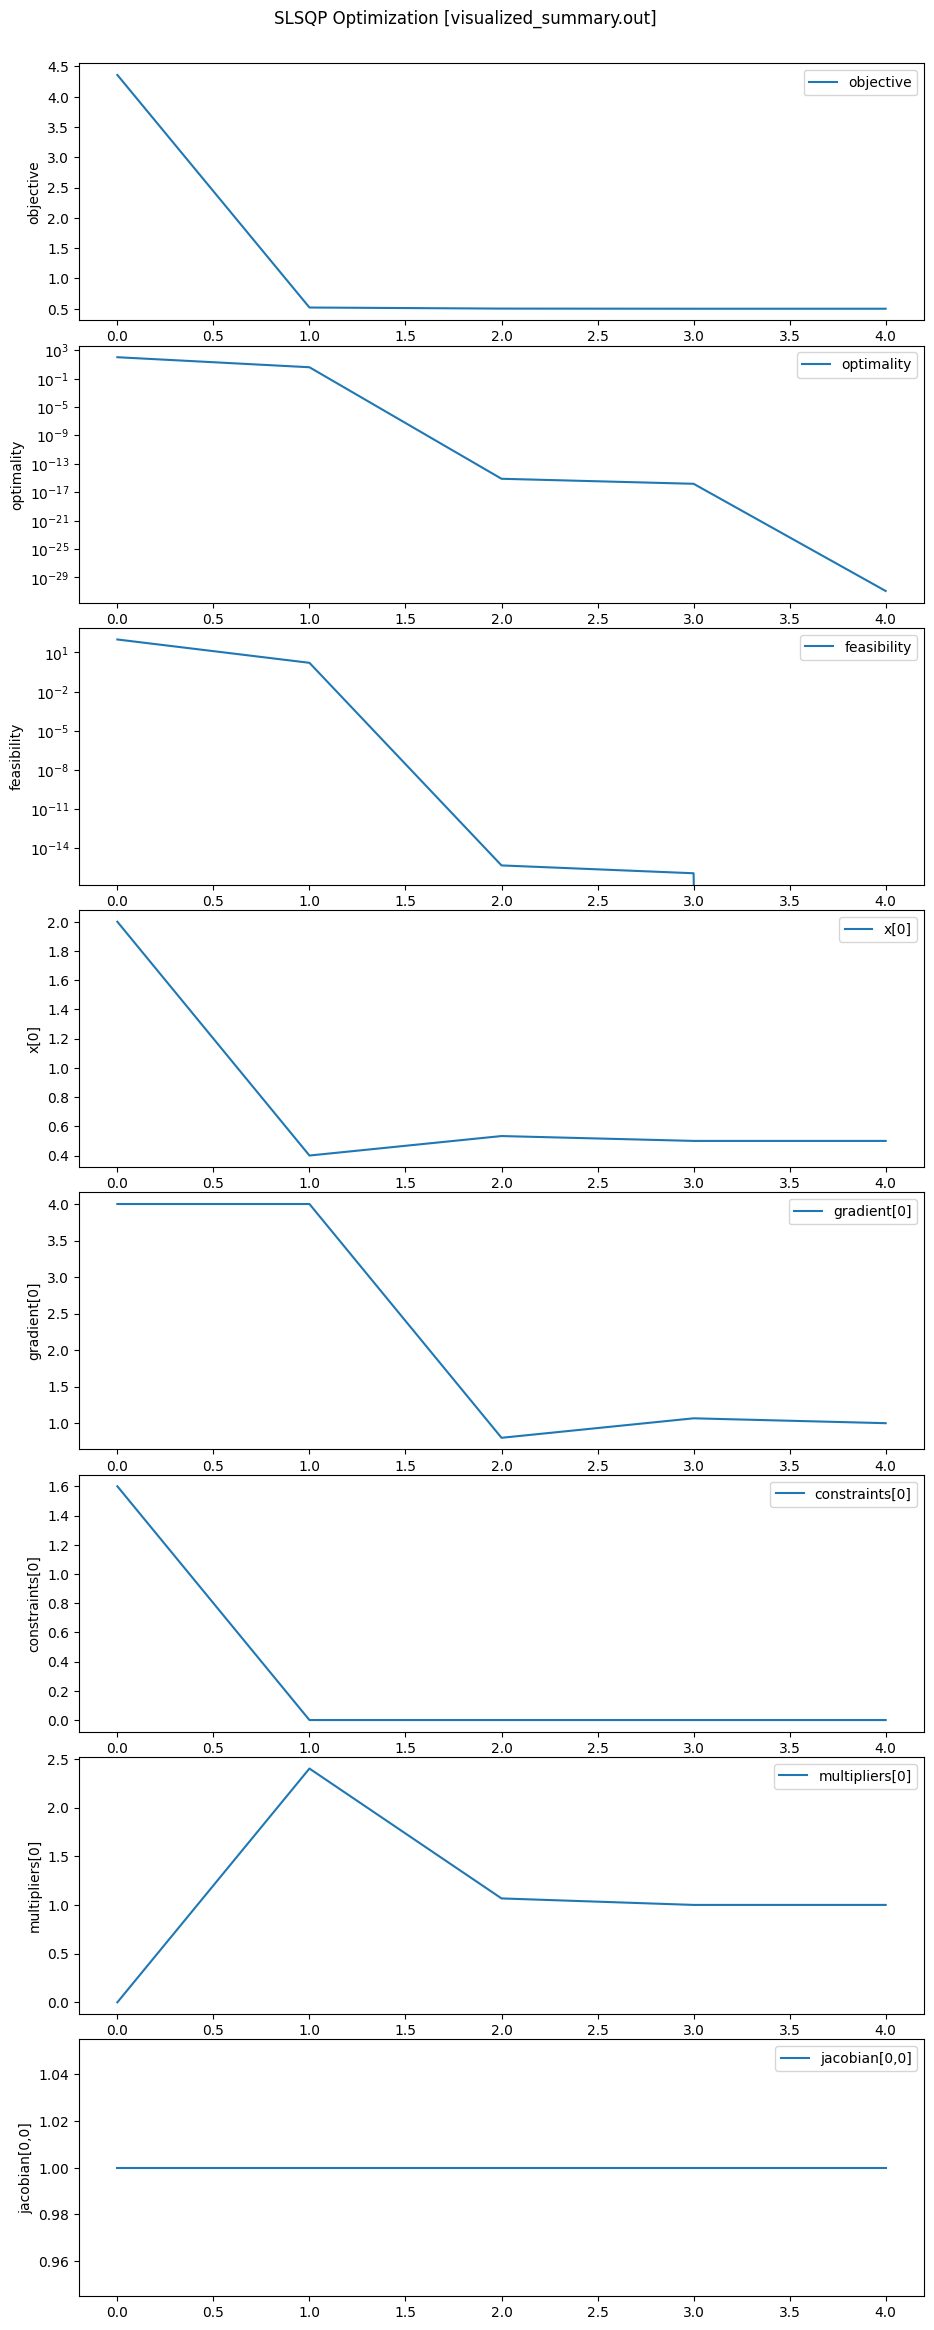

Optimization terminated successfully    (Exit mode 0)
            Final objective value                : 5.000000e-01
            Final optimality                     : 1.232595e-31
            Final feasibility                    : 0.000000e+00
            Number of major iterations           : 4
            Number of function evaluations       : 4
            Number of derivative evaluations     : 4
            Average Derivative evaluation time   : 0.000032 s per evaluation
            Average Function evaluation time     : 0.000037 s per evaluation
            Total Function evaluation time       : 0.000129 s [  0.00%]
            Total Derivative evaluation time     : 0.000149 s [  0.01%]
            Optimizer time                       : 0.000091 s [  0.00%]
            Processing time                      : 0.001566 s [  0.06%]
            Visualization time                   : 2.625929 s [ 99.93%]
            Total optimization time              : 2.627865 s [100.00%]
         

In [5]:
%matplotlib inline

results = optimize(x0, obj=objective, grad=gradient, con=constraints, jac=jacobian, 
                   meq=num_eqcon, xl=x_lower, xu=x_upper,
                   visualize=True, visualize_vars=['objective', 'optimality', 'feasibility', 'x[0]', 'gradient[0]', 'constraints[0]', 'multipliers[0]', 'jacobian[0,0]'],
                   summary_filename="visualized_summary.out", keep_plot_open=True)

Unlike in the console outputs from previous examples, see that "Visualization time" is nonzero now.
It is worth noting that visualization takes up most of time in smaller problems. 
For example, in the problem above, $99.8 \%$ of the total optimization time is spent on visualization.

## Writing optimization data to a file
To save the data and variables generated during the optimization iterations, set `save_itr=all` or `save_itr=major` when calling `optimize()`.
This will save the variables in the list defined by `save_vars` after every iteration if `save_itr=all`, or after each major iteration if `save_itr=major`.
By default, `save_vars=['x', 'objective', 'optimality', 'feasibility', 'step', 'iter', 'majiter', 'ismajor', 'mode']`. 
However, the user can specify any subset of variables from the list 
`['x', 'objective', 'optimality', 'feasibility', 'step', 'mode', 'iter', 'majiter', 'ismajor', 'constraints', 'gradient', 'multipliers', 'jacobian']`.
The user can also specify the name of file where the data is saved using the `save_filename` keyword argument.
The default name for the save file is `slsqp_recorder.hdf5`, and the data is always stored in the *hdf5* file format.

We now use the same example as before to save the optimization variables with their corresponding major iteration using `save_itr='major'` and `save_var=['majiter', 'x']`.
We will save the data to a file named `save_file.hdf5`.

In [6]:
results = optimize(x0, obj=objective, grad=gradient, con=constraints, jac=jacobian, 
                   meq=num_eqcon, xl=x_lower, xu=x_upper,
                   save_itr='major', save_vars=['majiter', 'x'],
                   save_filename="save_file.hdf5")

Optimization terminated successfully    (Exit mode 0)
            Final objective value                : 5.000000e-01
            Final optimality                     : 1.232595e-31
            Final feasibility                    : 0.000000e+00
            Number of major iterations           : 4
            Number of function evaluations       : 4
            Number of derivative evaluations     : 4
            Average Derivative evaluation time   : 0.000058 s per evaluation
            Average Function evaluation time     : 0.000136 s per evaluation
            Total Function evaluation time       : 0.000233 s [  0.53%]
            Total Derivative evaluation time     : 0.000544 s [  1.23%]
            Optimizer time                       : 0.000135 s [  0.31%]
            Processing time                      : 0.043345 s [ 97.94%]
            Visualization time                   : 0.000000 s [  0.00%]
            Total optimization time              : 0.044257 s [100.00%]
         

The console output above now tells us that the iteration data is saved to "*save_file.hdf5*".
For more details on accessing the saved data or using the saved data for visualization or hot/warm start, see [Post-processing](./postprocessing.md).

## Other optimizer options
The following table describes some of the other options that could be set while calling `optimize`.

```{list-table} Other options
:header-rows: 1
:name: otheroptions

* - Option
  - Type (default value)
  - Description
* - `maxiter`
  - *int* (100)
  - Maximum number of iterations.
* - `acc`
  - *float* (1e-6)
  - *|acc|* is the stopping criterion and controls the final accuracy. \
    If *acc < 0*, a maximization problem is solved. \
    Otherwise, a minimization problem is solved.
* - `iprint`
  - *int* (1)
  - Controls the verbosity of the SLSQP algorithm. \
    Set *iprint <= 0* to suppress all console outputs. \
    Set *iprint  = 1* to print only the final result summary upon completion. \
    Set *iprint >= 2* to print the status of each major iteration and the final result summary.
* - `keep_plot_open`
  - *bool* (False)
  - If True, the plot window will remain open after optimization.
* - `save_figname`
  - *str* ("slsqp_plot.pdf")
  - The name of the file to which the final plot will be saved.
* - `finite_diff_abs_step`
  - *np.ndarray* or *float* (None)
  - The absolute step size to use for numerical approximation of the derivatives. \
    If None (default), then step is selected using `finite_diff_rel_step`.
* - `finite_diff_rel_step`
  - *np.ndarray* or *float* \
     (`np.sqrt(np.finfo(float).eps)`)
  - The relative step size to use for numerical approximation of the derivatives. \
    The absolute step size is computed as ``h = rel_step * max(1, abs(x))``, \
    possibly adjusted to fit into the bounds. Not used if finite_diff_abs_step is given.
* - `callback`
  - *callable* (None)
  - Function to be called after each major iteration. \
    The function is called as`callback(x)`, \
    where ``x`` is the optimization variable vector from the current major iteration.
```

To get the complete list of options for `optimize()` and their default values as a dictionary, run `get_default_options()` as shown below.

In [7]:
from pyslsqp import get_default_options

options = get_default_options()
print_dict_as_table(options)

--------------------------------------------------
        obj                      : None
        grad                     : None
        con                      : None
        jac                      : None
        meq                      : 0
        callback                 : None
        xl                       : None
        xu                       : None
        x_scaler                 : 1.0
        obj_scaler               : 1.0
        con_scaler               : 1.0
        maxiter                  : 100
        acc                      : 1e-06
        iprint                   : 1
        finite_diff_abs_step     : None
        finite_diff_rel_step     : 1.4901161193847656e-08
        summary_filename         : slsqp_summary.out
        warm_start               : False
        hot_start                : False
        load_filename            : None
        save_itr                 : None
        save_filename            : slsqp_recorder.hdf5
        save_vars             

For postprocessing saved data, see [Post-processing](./postprocessing.md).

For the complete API of PySLSQP, visit the [API Reference](./api.md).